<a href="https://colab.research.google.com/github/AkothCarole/Autolib_Services/blob/master/Independent_Project_Week_4__5_2020_Caroline__Akoth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assessment of Autolib Car Services

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load and preview the dataset

autolib= pd.read_csv("autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
#Checking Data

autolib.shape

(16085, 13)

In [8]:
#Preview the bottom of the dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [10]:
#Describe the data
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#**Data Cleaning**

In [13]:
#Check for Null values and remove duplicates
null_autolib = autolib.isnull().any()
null_autolib

duplicates_autolib = autolib.duplicated().sum()
duplicates_autolib

0

In [14]:
#Drop all null values
autolib = autolib.dropna(how='all')
autolib


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [0]:
#Export cleaned CSV
autolib.to_csv("autolib.csv")

In [18]:
autolib = pd.read_csv('autolib.csv')
autolib.head()

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [19]:
## Convert day Type to Numerical
autolib['day_type'].replace({'weekday':0,'weekend':1},inplace =True)
autolib

,Unnamed: 0,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,0,75001,1/1/2018,1440,0,0,110,103,3,2,10,9,22,20
1,1,75001,1/2/2018,1438,1,0,98,94,1,1,8,8,23,22
2,2,75001,1/3/2018,1439,2,0,138,139,0,0,2,2,27,27
3,3,75001,1/4/2018,1320,3,0,104,104,2,2,9,8,25,21
4,4,75001,1/5/2018,1440,4,0,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,16080,95880,6/15/2018,1440,4,0,15,10,0,0,2,3,0,0
16081,16081,95880,6/16/2018,1440,5,1,19,19,0,0,2,1,0,0
16082,16082,95880,6/17/2018,1440,6,1,33,35,1,1,0,0,0,0
16083,16083,95880,6/18/2018,1440,0,0,11,14,3,5,2,2,0,0


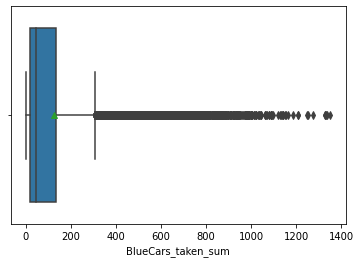

In [22]:
#Checking Outliers for Blue cars and Utilib 1.4 
sns.boxplot(autolib['BlueCars_taken_sum'],showmeans=True)



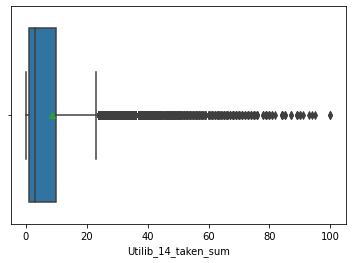

In [23]:
#Outliers for Utilib 1.4

sns.boxplot(autolib['Utilib_14_taken_sum'],showmeans=True)

In [24]:
#Checking for anomalies

print(autolib.nunique())

Unnamed: 0                16085
Postal code                 104
date                        156
n_daily_data_points          23
dayOfWeek                     7
day_type                      2
BlueCars_taken_sum          932
BlueCars_returned_sum       929
Utilib_taken_sum             48
Utilib_returned_sum          49
Utilib_14_taken_sum          92
Utilib_14_returned_sum       94
Slots_freed_sum             297
Slots_taken_sum             301
dtype: int64


In [25]:
autolib_q1 = autolib['BlueCars_taken_sum'].quantile(.25)
autolib_q3 = autolib['BlueCars_taken_sum'].quantile(.75)
iqr_bluecars = autolib_q3 - autolib_q1

q1_utilib = autolib['Utilib_14_taken_sum'].quantile(.25)
q3_utilib = autolib['Utilib_14_taken_sum'].quantile(.75)
iqr_utilib = q1_utilib - q3_utilib

print(iqr_bluecars,iqr_utilib)



115.0 -9.0


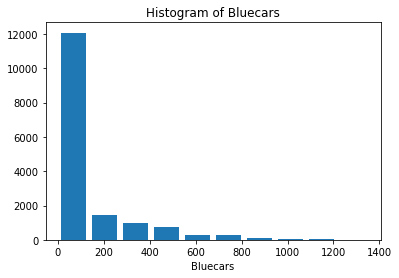

In [27]:
#Creating histogram fo Blue cars Taken 

autolib_bluecars = autolib['BlueCars_taken_sum']
plt.hist(autolib_bluecars,bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Bluecars')
plt.ylabel('')
plt.title('Histogram of Bluecars')
plt.show()



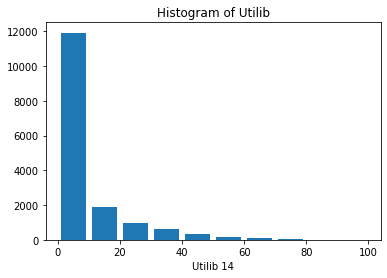

In [28]:
#Creatign Histogram for Utilib 14 Taken

autolib_utilib = autolib['Utilib_14_taken_sum']
plt.hist(autolib_utilib,bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Utilib 14')
plt.ylabel('')
plt.title('Histogram of Utilib')
plt.show()


In [31]:
#Measures of central tendancies and dispersion
autolib.describe()

,Unnamed: 0,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,8042.000000,88791.293876,1431.330619,2.969599,0.282313,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,4643.483875,7647.342000,33.212050,2.008378,0.450139,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,0.000000,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4021.000000,91330.000000,1439.000000,1.000000,0.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,8042.000000,92340.000000,1440.000000,3.000000,0.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,12063.000000,93400.000000,1440.000000,5.000000,1.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,16084.000000,95880.000000,1440.000000,6.000000,1.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [37]:
#Mode for date 
autolib['BlueCars_taken_sum'].mode()

0    12
dtype: int64

In [38]:
#Mode for Utilib 14
autolib['Utilib_14_taken_sum'].mode()

0    0
dtype: int64

In [39]:
#median of the Blue cars taken
autolib['BlueCars_taken_sum'].median()

46.0

In [40]:
#median of the Utilib
autolib['Utilib_14_taken_sum'].median()

3.0

In [41]:
#Measure of dispersion (Skewness)
autolib['BlueCars_taken_sum'].skew()

2.4063548974959086

In [42]:
#Measure of dispersion(Skewness-Utilib 14)
autolib['Utilib_14_taken_sum'].skew()

2.5109244534822923

#**Bivariate Analysis**

In [70]:
#drop columns we dont need for analysis

#autolib.drop(['n_daily_data_points','Postal code','date'], axis= 1, inplace=True)
#autolib.drop(['BlueCars_returned_sum','Utilib_returned_sum','Slots_freed_sum'], axis= 1, inplace= True)
autolib.drop(['Utilib_14_returned_sum'], axis=1, inplace=True)
autolib.head()

,Unnamed: 0,dayOfWeek,day_type,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Slots_taken_sum
0,0,0,0,110,3,10,20
1,1,1,0,98,1,8,22
2,2,2,0,138,0,2,27
3,3,3,0,104,2,9,21
4,4,4,0,114,3,6,20


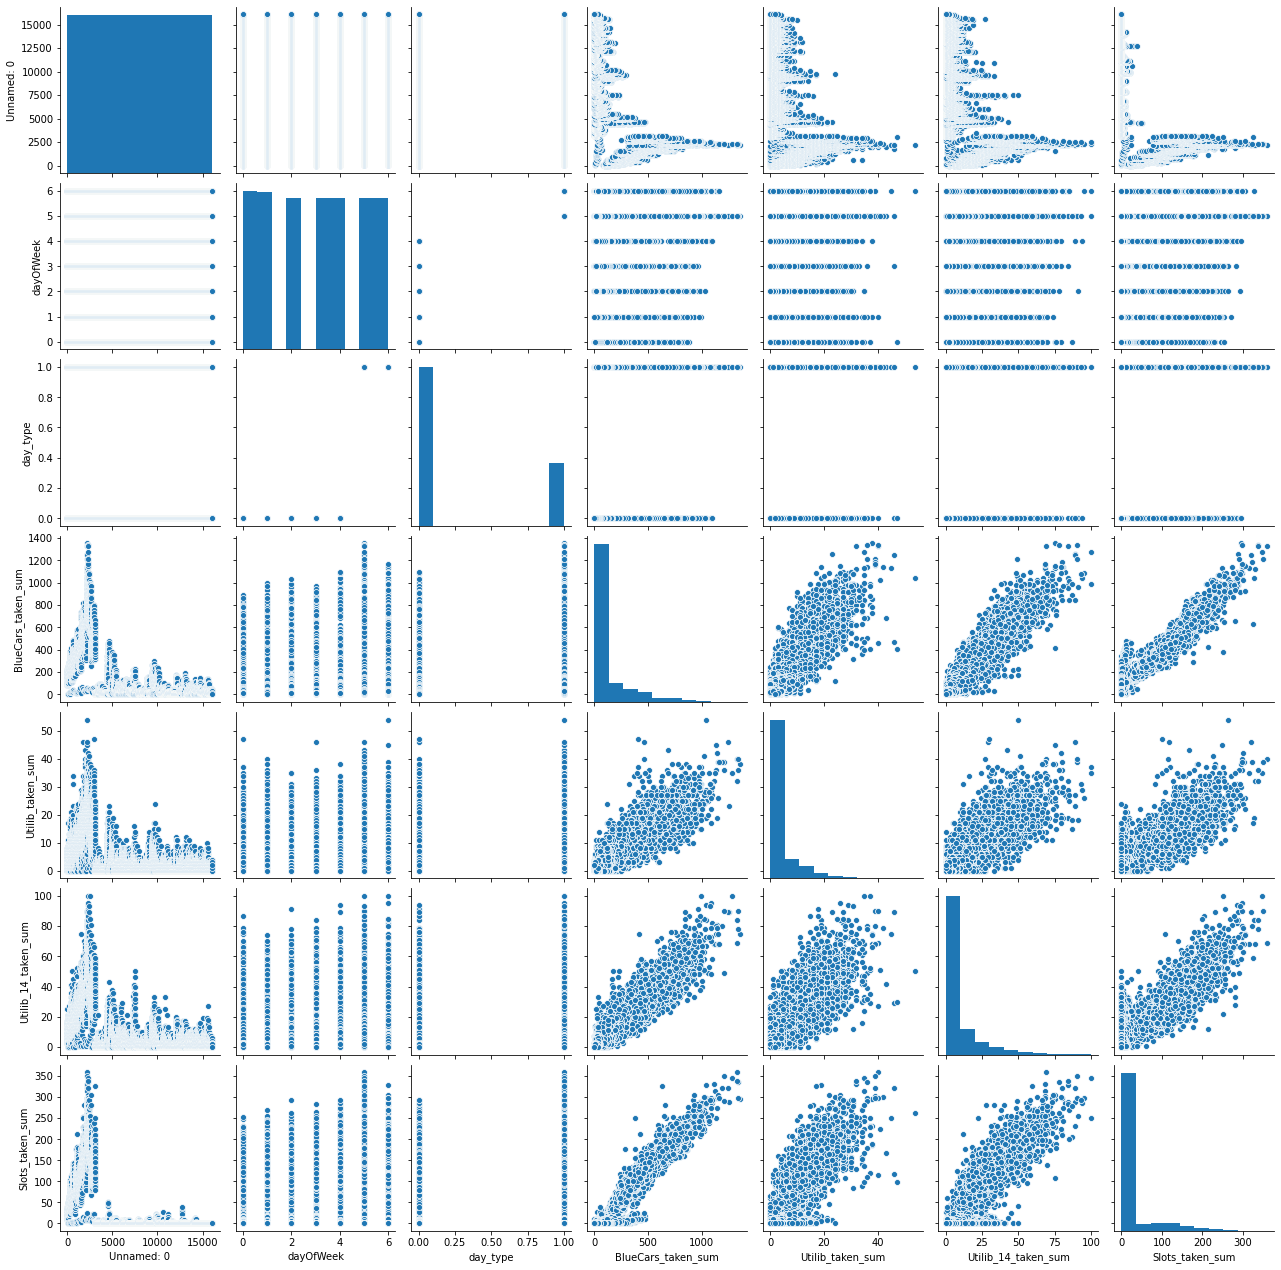

In [71]:

#Plot Bivariate 
sns.pairplot (autolib)
plt.show()


In [68]:
autolib.corr()
#Correlations are weak

,Unnamed: 0,dayOfWeek,day_type,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_taken_sum
Unnamed: 0,1.000000,0.000506,0.000691,-0.565539,-0.504746,-0.527679,-0.527487,-0.553431
dayOfWeek,0.000506,1.000000,0.790473,0.079649,0.069295,0.068790,0.071279,0.050468
day_type,0.000691,0.790473,1.000000,0.085115,0.074940,0.074521,0.077277,0.052221
BlueCars_taken_sum,-0.565539,0.079649,0.085115,1.000000,0.893833,0.940946,0.940757,0.947996
Utilib_taken_sum,-0.504746,0.069295,0.074940,0.893833,1.000000,0.847519,0.846304,0.853049
Utilib_14_taken_sum,-0.527679,0.068790,0.074521,0.940946,0.847519,1.000000,0.992062,0.898719
Utilib_14_returned_sum,-0.527487,0.071279,0.077277,0.940757,0.846304,0.992062,1.000000,0.899777
Slots_taken_sum,-0.553431,0.050468,0.052221,0.947996,0.853049,0.898719,0.899777,1.000000


#Hypothesis Testing


Autolib Services has provided a dataset that shows the distribution of rental casrs. In this exercise we shall focus the comparison of Blue cars vs Utilib

H0 = Average number of Utilib 14 cars taken is 10

Ha = Average number of Utilib 14 cars taken  is not 10

The null hypothesis has been identified because by simple visualisation of Blue cars taken vs Utilib 14 Blue cars registers higher numbers. The exercise would therefore like to see the average daily rentals for utilib

#Steps for performing Hypothesis Testing

1. Set up Null Hypothesis (H0)
2. State the alternate hypothesis (H1)
3. Set a significance level (alpha)
4. Calculate test statistics 
5. Decision to accept or reject null hypothesis


#Set up sample

In [83]:
#Create samples for weekends  and weekdays

sample_weekday = autolib['day_type']==0
sample_weekend = autolib['day_type'] ==1
print(sample_weekday,sample_weekend)


0         True
1         True
2         True
3         True
4         True
         ...  
16080     True
16081    False
16082    False
16083     True
16084     True
Name: day_type, Length: 16085, dtype: bool 0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081     True
16082     True
16083    False
16084    False
Name: day_type, Length: 16085, dtype: bool


In [85]:
#print shape of samples

print(sample_weekday.shape,sample_weekend.shape)

(16085,) (16085,)


Use stratified random sampling by dates to pick 20 % of the car rentals


In [98]:
#Selecting sample

sample_autolib=autolib.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.2))
sample_autolib.head()

,Unnamed: 0,dayOfWeek,day_type,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Slots_taken_sum
5222,5222,3,0,65,3,1,0
11959,11959,0,0,4,0,0,0
950,950,0,0,269,5,20,79
186,186,2,0,176,4,12,36
12779,12779,1,0,52,0,1,1


#Assumptions for T-test

1. The variance of the samples are equal
2. The distribution of the residuals between the two samples follow a normal distribution curve
This shall be checked using Qq plot and checked for normality using Shapiro-Wilks test.


Alpha =0.05


In [0]:
#Import Stats package
from scipy import stats

In [0]:
stats,Pvalue = stats.levene (sample_weekday['day_type'],sample_weekend['day_type'])
print(f' Test statistics:{Stats}\n Alpha:{alpha}\n P-value: {Pvalue}')
if Pvalue > alpha:
  print('Null hypotheses is accepted')
else:
  print('Null hypotheses is rejected')

In [0]:
##Check for normality
normalitycheck = scale((np.array(sample_weekday['day_type'])-np.array(sample_weekend['day_type'])))
plt.figure(figsize=(12,6))
plt.hist(normalitycheck)
plt.show()

In [130]:
#Statistical Test for Normality

from scipy.stats import shapiro 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm

Utilibtaken = sample_autolib['Utilib_taken_sum']

stat,p = shapiro(Utilibtaken)
print ('Statistics=%.3f,p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
  print('Normal Distribution')
else:
  print ('Dataset does not show normal distribution')



Statistics=0.663,p=0.000
Dataset does not show normal distribution


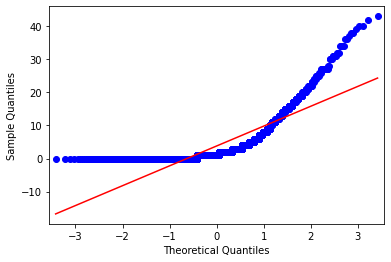

In [132]:
#Show distribution of fields
qqplot(Utilibtaken,line='s')
plt.show()

Remember Hypothesis we are testing

H0 = Average number of Utilib 14 cars taken is 10


Ha = Average number of Utilib 14 cars taken  is not 10



In [121]:
# Show Sample

sample_autolib.head()

,Unnamed: 0,dayOfWeek,day_type,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Slots_taken_sum
5222,5222,3,0,65,3,1,0
11959,11959,0,0,4,0,0,0
950,950,0,0,269,5,20,79
186,186,2,0,176,4,12,36
12779,12779,1,0,52,0,1,1


In [122]:
#Point estimation
autolib['Utilib_14_taken_sum'].mean()
sample_autolib['Utilib_14_taken_sum'].mean()
scale = autolib['Utilib_14_taken_sum'].mean()-sample_autolib['Utilib_14_taken_sum'].mean()
print(scale)


-0.21199875660553325


In [133]:
#Find mean of Utilib

autolib['Utilib_14_taken_sum'].mean()


8.600559527510102

In [123]:
#Choice of test for the population

#In this exercise we use z Test 

z_score = (10-sample_autolib['Utilib_14_taken_sum'].mean())/sample_autolib['Utilib_14_taken_sum'].std()
z_score

0.08910890286676633

In [141]:
#Finding P value of for the statistics

P_value = stats.norm.cdf (z_score)
P_value
if P_value > 0.05:
  print ('p value is greated than alpha therefore null hypotheses is accepted')
else:
  print ('Reject null hypotheses')

p value is greated than alpha therefore null hypotheses is accepted


#Conclusion and Observations
Rental for Blue cars are doing better than utilib 14 which has a daily average of 8. P value of **0.53 ** illustrates that there's a probability of 53% of more than 10 utilib 14 cars to be taken per day
